In [1]:
# https://www.kaggle.com/kemalty/feed-forward-n-n-with-keras-for-fashion-mnist/notebook?select=fashion-mnist_train.csv

import pandas as pd
from keras.utils import to_categorical

# Loading and pre-processing training dataset
train_data = pd.read_csv("data/fashion-mnist_train.csv")
train_label = pd.DataFrame(train_data[["label"]].copy(deep=False)) # Seperate labels (y) from inputs (X)
train_input = pd.DataFrame(train_data.drop("label", 1, inplace=False))
del train_data

# Convert labels to dummies (one-hot encoding) so that they can be used in the output layer
train_label = to_categorical(train_label)

print(train_input.describe())

             pixel1        pixel2        pixel3        pixel4        pixel5  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.000900      0.006150      0.035333      0.101933      0.247967   
std        0.094689      0.271011      1.222324      2.452871      4.306912   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     36.000000    226.000000    164.000000    227.000000   

             pixel6        pixel7        pixel8        pixel9       pixel10  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.411467      0.805767      2.198283      5.682000     14.488767   
std        5.836188      8.215169     14.093378    

In [2]:
# Check the distribution of labels
import pandas as pd
print(pd.DataFrame(train_label).describe())

                  0             1             2             3             4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.100000      0.100000      0.100000      0.100000      0.100000   
std        0.299937      0.299937      0.299937      0.299936      0.299937   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  5             6             7             8             9  
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000  
mean       0.100000      0.100000      0.100000      0.100000      0.100000  
std        0.299934      0.299934      0.299934      0

In [3]:
# Normalize the inputs
train_means = train_input.mean(axis=0) # Keep these for test too
train_stds  = train_input.std(axis=0)
print("Means:")
print(train_means.head(5))
print("Stds:")
print(train_stds.head(5))

train_input = train_input - train_means # Zero mean
train_input = train_input / train_stds # 1 standard deviation

Means:
pixel1    0.000900
pixel2    0.006150
pixel3    0.035333
pixel4    0.101933
pixel5    0.247967
dtype: float64
Stds:
pixel1    0.094689
pixel2    0.271011
pixel3    1.222324
pixel4    2.452871
pixel5    4.306912
dtype: float64


In [4]:
# Loading and pre-processing testing dataset
test_data = pd.read_csv("data/fashion-mnist_test.csv") # Load the csv from file
test_label = pd.DataFrame(test_data[["label"]].copy(deep=False)) # Seperate labels (y) from inputs (X)
test_input = pd.DataFrame(test_data.drop("label", 1, inplace=False))
del test_data

# Convert labels to dummies (one-hot encoding) so that they can be used in the output layer
test_label = to_categorical(test_label)

print(pd.DataFrame(test_label).describe())

# Apply normalization
test_input = test_input - train_means # Zero mean
test_input = test_input / train_stds # 1 standard deviation

                  0             1             2             3             4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.100000      0.100000      0.100000      0.100000      0.100000   
std        0.300024      0.300024      0.300024      0.300025      0.300024   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  5             6             7             8             9  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  
mean       0.100000      0.100000      0.100000      0.100000      0.100000  
std        0.300024      0.300024      0.300024      0

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Set-up the network
model = Sequential()
model.add(Dense(units=500, input_dim=train_input.shape[1],
                activation="relu",
                 kernel_initializer="random_uniform",
                 bias_initializer="zeros"))
model.add(Dropout(0.30))
model.add(Dense(units=300, activation="relu", kernel_initializer="random_uniform", bias_initializer="zeros"))
model.add(Dropout(0.25))
model.add(Dense(units=200, activation="relu", kernel_initializer="random_uniform", bias_initializer="zeros"))
model.add(Dropout(0.20))
model.add(Dense(units=100, activation="relu", kernel_initializer="random_uniform", bias_initializer="zeros"))
model.add(Dropout(0.15))
model.add(Dense(units=50, activation="relu", kernel_initializer="random_uniform", bias_initializer="zeros"))
model.add(Dropout(0.10))
model.add(Dense(units=25, activation="relu", kernel_initializer="random_uniform", bias_initializer="zeros"))
model.add(Dropout(0.05))
model.add(Dense(units=10, activation="softmax"))

# Print out the network configuration
print(model.summary())

import numpy as np

X_train = train_input.to_numpy()
y_train = train_label

shared_percent = 25 / 100
shared_train_data_size = int(X_train.shape[0] * shared_percent)
num_models = 2

shared_train_data = X_train[:shared_train_data_size]
shared_train_labels = y_train[:shared_train_data_size]

private_train_data = np.split(X_train[shared_train_data_size:], num_models)
private_train_labels = np.split(
    y_train[shared_train_data_size:], num_models)

og_file_name = 'models/main_ff_{}_{}.h5'.format(int(shared_percent * 100), num_models)
model.save(og_file_name)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 500)               392500    
_________________________________________________________________
dropout_48 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 300)               150300    
_________________________________________________________________
dropout_49 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_50 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 100)              

In [63]:
from keras.optimizers import RMSprop
import keras

for i in range(num_models):
    print("Training model - {}".format(i))
    
    model_train_data = np.vstack((shared_train_data, private_train_data[i]))
    model_train_labels = np.concatenate(
        (shared_train_labels, private_train_labels[i]))

    model = keras.models.load_model(og_file_name)
    model.compile(loss='categorical_crossentropy', 
              optimizer="RMSprop",#lr=0.0001),
              metrics=['accuracy'])
    model.fit(model_train_data, model_train_labels, epochs=20, batch_size=6000)
    
    model_name = "models/model_ff_{}_{}_{}.h5".format(i, int(shared_percent * 100), num_models)
    model.save(model_name)

    # Evaluate the model
    test_loss_and_metrics = model.evaluate(test_input.to_numpy(), test_label)
    train_loss_and_metrics = model.evaluate(train_input.to_numpy(), train_label)
    print("")
    print("Test Accuracy:" + str(test_loss_and_metrics[1]))
    print("Train Accuracy:" + str(train_loss_and_metrics[1]))

Training model - 0
Epoch 1/20
7/7 [==============================] - 1s 112ms/step - loss: 2.1693 - accuracy: 0.1868
Epoch 2/20
7/7 [==============================] - 1s 129ms/step - loss: 1.6841 - accuracy: 0.3163
Epoch 3/20
7/7 [==============================] - 1s 100ms/step - loss: 1.3246 - accuracy: 0.4442
Epoch 4/20
7/7 [==============================] - 1s 106ms/step - loss: 1.2181 - accuracy: 0.4905
Epoch 5/20
7/7 [==============================] - 1s 105ms/step - loss: 1.0391 - accuracy: 0.5670
Epoch 6/20
7/7 [==============================] - 1s 110ms/step - loss: 0.9729 - accuracy: 0.5954
Epoch 7/20
7/7 [==============================] - 1s 103ms/step - loss: 0.9260 - accuracy: 0.6227
Epoch 8/20
7/7 [==============================] - 1s 116ms/step - loss: 0.8625 - accuracy: 0.6630
Epoch 9/20
7/7 [==============================] - 1s 112ms/step - loss: 0.8115 - accuracy: 0.6937
Epoch 10/20
7/7 [==============================] - 1s 123ms/step - loss: 0.7262 - accuracy: 0.7324


In [64]:
import math
import numpy as np

def split(array, nrows, ncols):
    """Split a matrix into sub-matrices."""
    r, h = array.shape
    if r % nrows != 0:
        padding = (math.ceil(r / nrows) * nrows) - r
        array = np.vstack((array, np.zeros((padding, h))))
        r, h = array.shape
    if h % ncols != 0:
        padding = (math.ceil(h / ncols) * ncols) - h
        array = np.hstack((array, np.zeros((r, padding))))
        r, h = array.shape
#     print(array.shape)
    num_x_blocks = math.ceil(r / float(nrows))
    num_y_blocks = math.ceil(h / float(ncols))
    
    rows = np.vsplit(array, num_x_blocks)
    return [np.array(np.hsplit(row, num_y_blocks)) for row in rows]  
#     chunks = array.reshape(h//nrows, nrows, -1, ncols).swapaxes(1, 2).reshape(-1, nrows, ncols)
#     return np.split(chunks, num_x_blocks)

def gather_blocks_to_pages(splits, num_elem_per_page):
    blocks = np.concatenate(splits)
    pages = []
    i = 0

    while i < len(blocks):
        count = 0
        page = []
        while i < len(blocks) and count + blocks[i].shape[0] * blocks[i].shape[1] <= num_elem_per_page:
            page.append(blocks[i])
            count += blocks[i].shape[0] * blocks[i].shape[1]
            i += 1
        pages.append(page)
        print("Adding {} elems to page {}".format(count, len(pages) - 1))
    return pages

# So we assume that if one page as lesser blocks than the other,
# We should see if the smaller one matches the bigger one from
# the start, and not anywhere in between
def page_similarity(ps1, ps2):
    sim = np.zeros((len(ps1), len(ps2)))
    
    for i, p1 in enumerate(ps1):
        for j, p2 in enumerate(ps2):
            k = min(len(p1), len(p2))
            a = np.array(p1[:k])
            b = np.array(p2[:k])
            c = np.count_nonzero(np.absolute(a - b) <= 0.01)
            sim[i][j] = c / a.size
    
    return sim
            

def merge_blocks(blocks, num_blocks_x, num_blocks_y, x, y):
    b_x, b_y = blocks[0].shape
    t_x, t_y = (b_x * num_blocks_x, b_y * num_blocks_y,)
    rows = [np.hstack(blocks[i*num_blocks_y:i*num_blocks_y+num_blocks_y]) for i in range(num_blocks_x)]
    matrix = np.vstack(rows)
    assert matrix.shape[0] == t_x
    r_x = t_x - x
    r_y = t_y - y
    if r_x == 0 and r_y == 0:
        return matrix
    elif r_x == 0:
        return matrix[:,:-r_y]
    elif r_y == 0:
        return matrix[:-r_x,:]
    else:
        return matrix[:-r_x, :-r_y]

# merge_blocks(x, 2, 2, 4, 4)
# x[0]

def pages_to_blocks(pages):
    blocks = []
    for p in pages:
        blocks.extend(p)
    return blocks

def merge_pages(p1, p2):
    ps = []
    for i, p in enumerate(p1):
        if i >= len(p2):
            ps.append(np.array(p))
        else:
            ps.append((p + p2[i]) / 2)
    return ps

def combine_similar_pages(ps1, ps2, sim_scores, threshold=0.9):
    new_ps1 = [None] * len(ps1)
    new_ps2 = [None] * len(ps2)
    
    for ps1_idx, scores in enumerate(sim_scores):
        if np.max(scores) >= threshold:
            ps2_idx = np.argmax(scores)
            print("PS1: Merging {} and {}".format(ps1_idx, ps2_idx))
            new_ps1[ps1_idx] = merge_pages(ps1[ps1_idx], ps2[ps2_idx])
            new_ps2[ps2_idx] = ps1_idx
        else:
            # No need to make new copies here since we should not be using ps1 or ps2 anymore
            new_ps1[ps1_idx] = ps1[ps1_idx]

    for ps2_idx in range(len(ps2)):
        if new_ps2[ps2_idx] is not None:
            ps1_idx = new_ps2[ps2_idx]
            print("PS2: Merging {} and {}".format(ps2_idx, ps1_idx))
            new_ps2[ps2_idx] = merge_pages(ps2[ps2_idx], ps1[ps1_idx])
        else:
            # No need to make new copies here since we should not be using ps1 or ps2 anymore
            new_ps2[ps2_idx] = ps2[ps2_idx]

    return new_ps1, new_ps2

def share_weights(w1, w2, a, b, c, t):
    m, n = w1.shape
    x = split(w1, a, b)
    bx, by = len(x), x[0].shape[0]

    y = split(w2, a, b)
    
    ps1 = gather_blocks_to_pages(x, c) # ~1MB 16 bytes * 63725
    ps2 = gather_blocks_to_pages(y, c) # ~1MB 16 bytes * 63725

    sim = page_similarity(ps1, ps2)
    
    nps1, nps2 = combine_similar_pages(ps1, ps2, sim, t)
    
    wb1 = pages_to_blocks(nps1)
    wb1 = merge_blocks(wb1, bx, by, m, n)
    
    wb2 = pages_to_blocks(nps2)
    wb2 = merge_blocks(wb2, bx, by, m, n)
    
    return wb1, wb2

In [65]:
model1 = keras.models.load_model('models/model_ff_0_25_2.h5')
model2 = keras.models.load_model('models/model_ff_1_25_2.h5')

w1, b1 = model1.layers[0].get_weights()
w2, b2 = model2.layers[0].get_weights()

w1, w2 = share_weights(w1, w2, 5, 5, 63725, 0.6)

Adding 63725 elems to page 0
Adding 63725 elems to page 1
Adding 63725 elems to page 2
Adding 63725 elems to page 3
Adding 63725 elems to page 4
Adding 63725 elems to page 5
Adding 10150 elems to page 6
Adding 63725 elems to page 0
Adding 63725 elems to page 1
Adding 63725 elems to page 2
Adding 63725 elems to page 3
Adding 63725 elems to page 4
Adding 63725 elems to page 5
Adding 10150 elems to page 6
PS1: Merging 1 and 1
PS1: Merging 4 and 4
PS1: Merging 5 and 5
PS2: Merging 1 and 1
PS2: Merging 4 and 4
PS2: Merging 5 and 5


In [66]:
w2.shape

(784, 500)

In [68]:
model1.layers[0].set_weights([w1, b1])
model2.layers[0].set_weights([w2, b2])

# Evaluate the model
test_loss_and_metrics = model1.evaluate(test_input.to_numpy(), test_label)
train_loss_and_metrics = model1.evaluate(train_input.to_numpy(), train_label)
print("")
print("Test Accuracy:" + str(test_loss_and_metrics[1]))
print("Train Accuracy:" + str(train_loss_and_metrics[1]))

# Evaluate the model
test_loss_and_metrics = model2.evaluate(test_input.to_numpy(), test_label)
train_loss_and_metrics = model2.evaluate(train_input.to_numpy(), train_label)
print("")
print("Test Accuracy:" + str(test_loss_and_metrics[1]))
print("Train Accuracy:" + str(train_loss_and_metrics[1]))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.5403 - accuracy: 0.8125

Test Accuracy:0.8119000196456909
Train Accuracy:0.8125166893005371
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4730 - accuracy: 0.8318

Test Accuracy:0.8299000263214111
Train Accuracy:0.8318166732788086


In [69]:
from keras.models import Model
import tensorflow as tf

def fisher(model, raw_data):
    y = model.output

    row_idx = tf.range(tf.shape(y)[0])
    col_idx = tf.argmax(y, axis=1, output_type=tf.dtypes.int32)
    full_indices = tf.stack([row_idx, col_idx], axis=1)
    fx_tensors = tf.gather_nd(y, full_indices)

    x_tensors = model.trainable_weights

    num_samples = 100
    m = Model(inputs=model.input, outputs=fx_tensors)

    fisher_information = []
    for v in range(len(x_tensors)):
        fisher_information.append(np.zeros(x_tensors[v].get_shape().as_list()).astype(np.float32))

    for i in range(num_samples):
        data_idx = np.random.randint(raw_data.shape[0])
        sampled_data = raw_data[data_idx:data_idx+1]
        sampled_input_variables = [ sampled_data ]
        print ('sample num: %4d, data_idx: %5d' % (i, data_idx))

        with tf.GradientTape() as tape:
            p = m(sampled_data)
            lo = tf.math.log(p)

        gradients = tape.gradient(lo, x_tensors)
        derivatives = [g.numpy() for g in gradients]
        prob = p.numpy()[0]

    #     derivatives, prob = sess.run([tf.gradients(tf.log(fx_tensors), x_tensors), fx_tensors],
    #     feed_dict={t: v for t,v in zip(input_tensors, sampled_input_variables)})

        for v in range(len(fisher_information)):
            fisher_information[v] += np.square(derivatives[v]) * prob

    for v in range(len(fisher_information)):
        fisher_information[v] /= num_samples
    
    return fisher_information

In [70]:
model1 = keras.models.load_model('models/model_ff_0_25_2.h5')
model2 = keras.models.load_model('models/model_ff_1_25_2.h5')

model_train_data = np.vstack((shared_train_data, private_train_data[0]))
model_train_labels = np.concatenate(
    (shared_train_labels, private_train_labels[0]))

fi = fisher(model1, model_train_data)

sample num:    0, data_idx:  1815
sample num:    1, data_idx: 30158
sample num:    2, data_idx:   605
sample num:    3, data_idx: 35390
sample num:    4, data_idx:  4884
sample num:    5, data_idx: 20392
sample num:    6, data_idx: 31380
sample num:    7, data_idx: 29840
sample num:    8, data_idx: 16918
sample num:    9, data_idx: 18693
sample num:   10, data_idx:  2447
sample num:   11, data_idx: 20680
sample num:   12, data_idx:  2298
sample num:   13, data_idx: 25015
sample num:   14, data_idx:  8542
sample num:   15, data_idx: 36711
sample num:   16, data_idx: 11445
sample num:   17, data_idx: 11763
sample num:   18, data_idx: 13824
sample num:   19, data_idx: 26055
sample num:   20, data_idx:  5715
sample num:   21, data_idx:    40
sample num:   22, data_idx:  3707
sample num:   23, data_idx:  7032
sample num:   24, data_idx: 33471
sample num:   25, data_idx: 27226
sample num:   26, data_idx:  6420
sample num:   27, data_idx: 27902
sample num:   28, data_idx: 18783
sample num:   

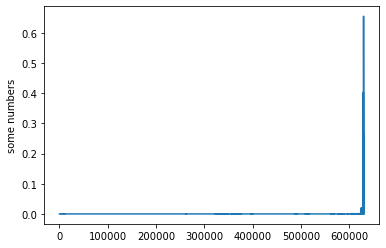

In [71]:
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

d = [x.flatten() for x in fi]
d = np.concatenate(d)

# d = a[0].flatten()
# index = np.arange(len(d))
# plt.bar(index, d)
plt.plot(d)
plt.ylabel('some numbers')
plt.show()